# Hydrogenic single solution Schrodinger equation

In [1]:
using Pkg;
Pkg.activate("../../SchrodingerEquationSolver");
include("../src/SchrodingerEquationSolver.jl");
import .SchrodingerEquationSolver as ses
import .ses.Grids as Grids
import .ses.Potentials as Potentials
import .ses.MathUtils as MathUtils
import .ses.Hydrogen as Hydrogen
import .ses.InitialConditions as InitialConditions
import .ses.OneDSchrodingerEquationSolver as odses
import .ses.EigenvalueFinders as EigenvalueFinders
using Plots

  Activating project at `~/Desktop/physics_coding_projects/julia/SchrodingerEquationSolver`


In [2]:

Z::Int64=2; #Atomic number, also used as the charge of coulomb potential.


# Space grid definition and creation
r_min::Float64=1.0e-8; #Where the space grid starts.
r_max::Float64=10.0; #Where the space grid ends.
N=15000; #Number of points in the space grind.
grid= Grids.uniform_grid(r_min, r_max, N); #Grid creation, grid is the list with the grid points.

In [4]:
#Definition of the potentials with angular quantum number 0 
l::Int64=0;
v_colu= Potentials.coulomb_potential(Z, grid);
v_angu= Potentials.angular_potential(l, grid);
v_effe= v_colu + v_angu;

In [5]:
n::Float64=1.0; #shell level
ei= -0.5*(Z^2 / n^2); #Energy of hydrogenic atom
#Definition of initial conditions
init_valu1_fwrd, init_valu2_fwrd,
init_valu1_bwrd, init_valu2_bwrd =InitialConditions.atom(grid, ei, l);

# Solution of Schrodinger’s equation of the form 

$\frac{1}{2} \frac{d^2 u}{dr^2} + v_{effe} u = e_i u$

The solver integrates the equation from r_{min} to r_{max} (forward integration) and vice versa (backwards integration). The function returns the integrated function $u$ and the value of the merge of both forward and backwards solutions.

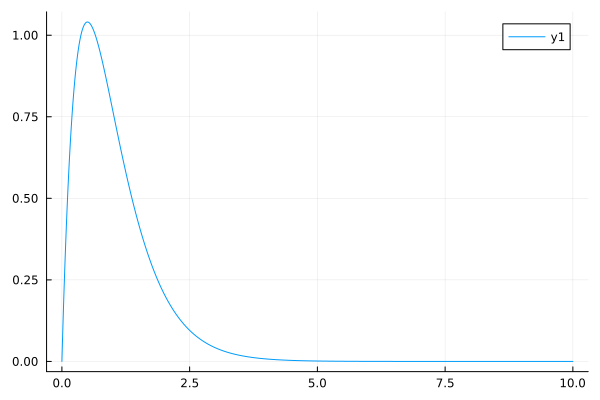

In [6]:

integrador_type::String="Numerov"
u_merged, merge_value= odses.solver(ei,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
init_valu2_bwrd, v_effe, grid, integrador_type);
plot(grid, u_merged)
#plot(size=(900,400))